In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import app.eda as eda
from sklearn.metrics import roc_curve
import scikitplot as skplt
import datetime
from sklearn.model_selection import GridSearchCV
from time import time

%matplotlib inline

In [3]:
pd.set_option("display.max_columns", 500)

In [4]:
#importing data
data = pd.read_json("data.json")

In [5]:
df = eda.clean_data(data)

In [6]:
df.head()

,label,body_length,channels,delivery_method,fb_published,gts,has_analytics,has_logo,listed,name_length,num_order,num_payouts,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,sold,currency_AUD,currency_CAD,currency_EUR,currency_GBP,currency_MXN,currency_NZD,currency_USD,payout_type_ACH,payout_type_CHECK,payout_type_undefined,public_domain_False,public_domain_True
0,True,3852,5,0.0,0,0.00,0,0,1,60,0,0,0.0,0.0,29.0,33,1,36,0,0,0,0,0,0,0,1,0,0,1,0,1
1,False,3499,0,1.0,0,868.02,0,1,0,27,23,1,0.0,12.0,28.0,28,0,149,25,0,0,0,0,0,0,1,0,1,0,1,0
2,False,2601,8,1.0,0,3500.00,0,0,1,28,19,4,0.0,0.0,54.0,54,0,214,48,0,0,0,0,0,0,1,0,1,0,1,0
3,False,12347,6,1.0,0,1167.35,0,1,1,21,39,16,0.0,0.0,0.0,0,0,889,58,0,0,1,0,0,0,0,1,0,0,1,0
4,False,2417,11,0.0,1,2313.15,0,0,1,66,30,0,0.0,0.0,63.0,63,0,35,39,0,0,0,0,0,0,1,0,1,0,1,0


In [7]:
y = df.pop("label").values
X = df.values

In [8]:
X.shape

(14132, 30)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Gradient boosting classifier

In [10]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [11]:
#confusion matrix
precision, recall, accuracy, matrix = eda.metrics(y_test, gbc_pred)

In [12]:
matrix

array([[ 251,   18],
       [  36, 3228]])

In [13]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))
print("Accuracy: {}".format(round(accuracy*100,2)))

Recall: 0.87
Precision: 0.93
Accuracy: 98.47


In [14]:
#predicted probabilities
scores = gbc.predict_proba(X_test)

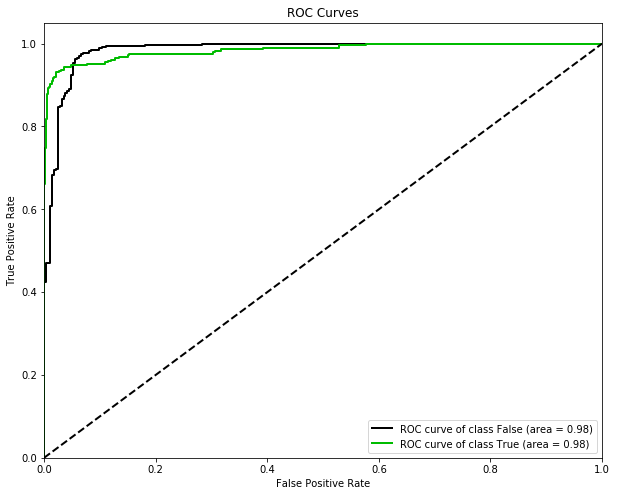

In [15]:
_=skplt.metrics.plot_roc(y_test, scores, plot_micro=False, plot_macro=False, figsize=(10,8))

In [18]:
# use a full grid over all parameters
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.1],
    "max_depth":[3,5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"]
    }

# run grid search
start = time()
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, n_jobs=-1)

grid_search.fit(X_train, y_train)
end = time()

In [19]:
gbc_best = grid_search.best_estimator_
gbc_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [20]:
gbc_pred1 = gbc_best.predict(X_test)

In [21]:
#confusion matrix
precision, recall, accuracy, matrix = eda.metrics(y_test, gbc_pred1)

In [22]:
matrix

array([[ 255,   17],
       [  32, 3229]])

In [23]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))
print("Accuracy: {}".format(round(accuracy*100,2)))

Recall: 0.89
Precision: 0.94
Accuracy: 98.61


In [24]:
#predicted probabilities
scores = gbc_best.predict_proba(X_test)

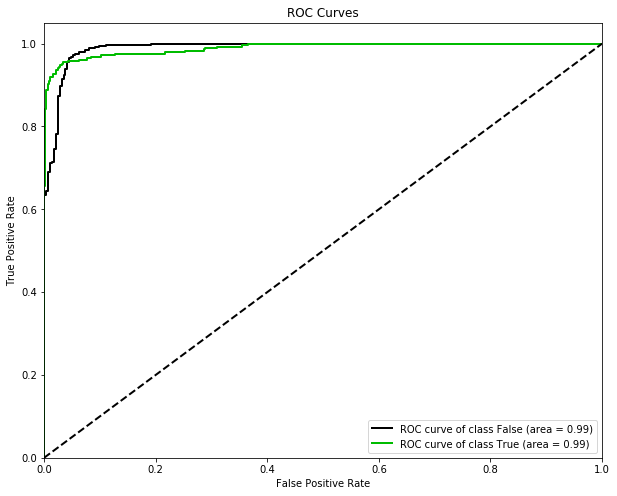

In [25]:
_=skplt.metrics.plot_roc(y_test, scores, plot_micro=False, plot_macro=False, figsize=(10,8))